$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Autoencoder Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import neuralnetworks as nn

import pickle
import gzip

Get data from [DeepLearning Tutorial](http://deeplearning.net/tutorial/gettingstarted.html).

In [2]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xorig = np.vstack([a.reshape((28, 28, 1))[np.newaxis, :, :, :] for a in train_set[0]])
Torig = np.array(train_set[1]).reshape((-1,1))

Xtest = np.vstack([a.reshape((28,28,1))[np.newaxis,:,:,:] for a in test_set[0]])
Ttest = np.array(test_set[1]).reshape((-1,1))

Xorig.shape, Torig.shape, Xtest.shape, Ttest.shape

((50000, 28, 28, 1), (50000, 1), (10000, 28, 28, 1), (10000, 1))

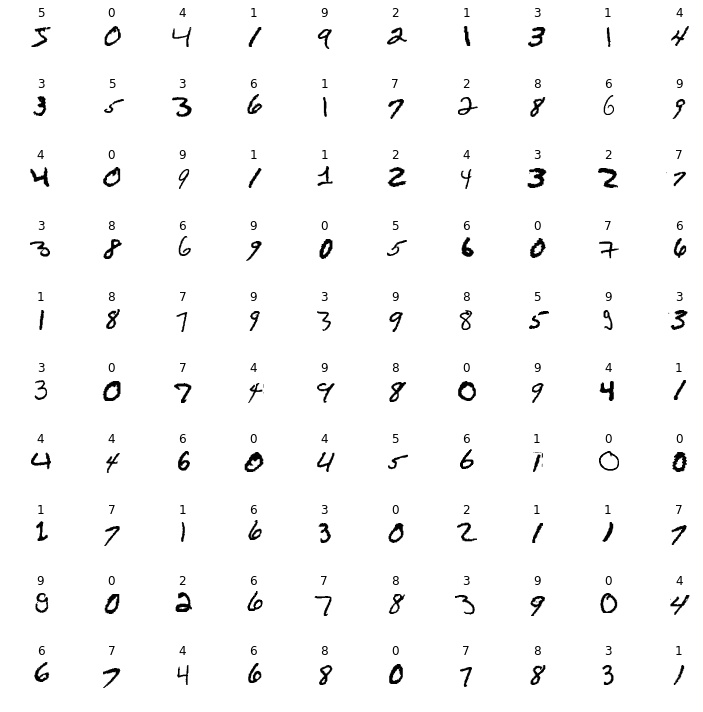

In [3]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(-Xorig[i,:].reshape((28,28)),interpolation='nearest',cmap='gray')
    plt.axis('off')
    plt.title(str(Torig[i][0]))
plt.tight_layout()

In [4]:
if True:
    nEach = 100
    useThese = []
    for digit in range(10):
        useThese += np.where(Torig == digit)[0][:nEach].tolist()
    useThese = np.array(useThese)
    np.random.shuffle(useThese)
    X = Xorig[useThese,:]
    T = Torig[useThese,:]
    del Xorig # to save memory
    del Torig
else:
    X = Xorig
    T = Torig
X.shape, T.shape

((1000, 28, 28, 1), (1000, 1))

Flatten each 28x28 image into a 784 vector.

In [5]:
X = X.reshape((1000,784))
X.shape

(1000, 784)

In [6]:
rowsShuffled = np.arange(X.shape[0])
np.random.shuffle(rowsShuffled)
nTrain = int(X.shape[0] * 0.8)
Xtrain = X[rowsShuffled[:nTrain],:]
Ttrain = T[rowsShuffled[:nTrain],:]
Xtest = X[rowsShuffled[nTrain:],:]
Ttest = T[rowsShuffled[nTrain:],:]
Xtrain.shape,Ttrain.shape, Xtest.shape,Ttest.shape

((800, 784), (800, 1), (200, 784), (200, 1))

In [15]:
import time
startTime = time.time()
nnet = nn.NeuralNetwork(784, [100, 50, 2, 50, 100],784)
nnet.train(X, X, nIterations=1000, verbose=True)
print('Training took', (time.time() - startTime) / 60, 'minutes.')

SCG: Iteration 100 ObjectiveF=0.34879 Scale=1.000e-15 Time=0.00339 s/iter
SCG: Iteration 200 ObjectiveF=0.32883 Scale=1.000e-15 Time=0.00349 s/iter
SCG: Iteration 300 ObjectiveF=0.31042 Scale=1.000e-15 Time=0.00357 s/iter
SCG: Iteration 400 ObjectiveF=0.30077 Scale=1.000e-15 Time=0.00356 s/iter
SCG: Iteration 500 ObjectiveF=0.29369 Scale=1.000e-15 Time=0.00362 s/iter
SCG: Iteration 600 ObjectiveF=0.28688 Scale=1.000e-15 Time=0.00363 s/iter
SCG: Iteration 700 ObjectiveF=0.28132 Scale=1.000e-15 Time=0.00361 s/iter
SCG: Iteration 800 ObjectiveF=0.27714 Scale=1.000e-15 Time=0.00362 s/iter
SCG: Iteration 900 ObjectiveF=0.27347 Scale=1.000e-15 Time=0.00353 s/iter
SCG: Iteration 1000 ObjectiveF=0.26977 Scale=1.000e-15 Time=0.00359 s/iter
Training took 1.111190962791443 minutes.


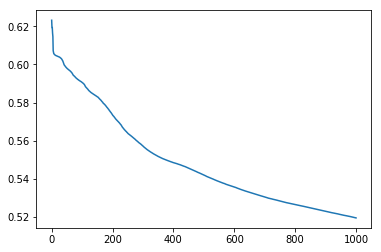

In [16]:
plt.plot(nnet.getErrorTrace());

In [17]:
Y,allOutputs = nnet.use(X,allOutputs=True)

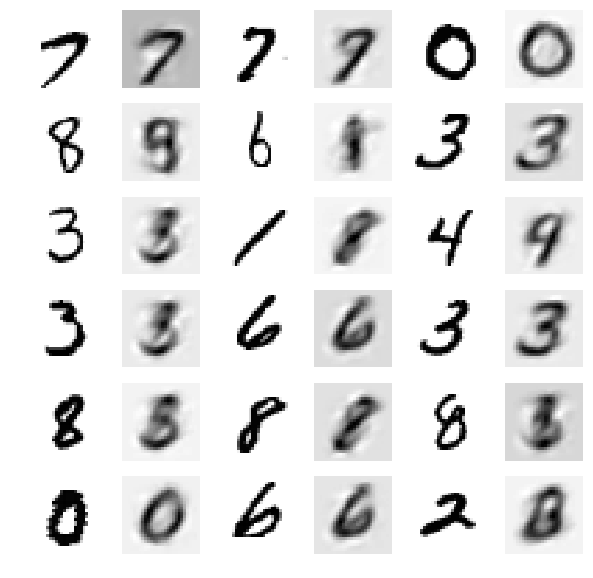

In [18]:
plt.figure(figsize=(10,10))
for i in range(0,36,2):
    plt.subplot(6,6,i+1)
    plt.imshow(-X[i,:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.subplot(6,6,i+2)
    plt.imshow(-Y[i,:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

In [19]:
len(allOutputs)

5

In [20]:
allOutputs[2].shape

(1000, 2)

SCG: Iteration 4000 ObjectiveF=0.21900 Scale=1.000e-15 Time=0.00289 s/iter
SCG: Iteration 8000 ObjectiveF=0.19977 Scale=1.000e-15 Time=0.00290 s/iter
SCG: Iteration 12000 ObjectiveF=0.18834 Scale=1.000e-15 Time=0.00289 s/iter
SCG: Iteration 16000 ObjectiveF=0.18110 Scale=1.000e-15 Time=0.00292 s/iter
SCG: Iteration 20000 ObjectiveF=0.17448 Scale=1.000e-15 Time=0.00291 s/iter
SCG: Iteration 24000 ObjectiveF=0.17024 Scale=1.000e-15 Time=0.00286 s/iter
SCG: Iteration 28000 ObjectiveF=0.16715 Scale=1.000e-15 Time=0.00285 s/iter
SCG: Iteration 32000 ObjectiveF=0.16513 Scale=1.000e-15 Time=0.00285 s/iter
SCG: Iteration 36000 ObjectiveF=0.16258 Scale=1.000e-15 Time=0.00284 s/iter
SCG: Iteration 40000 ObjectiveF=0.16061 Scale=1.000e-15 Time=0.00284 s/iter
Training took 37.22170673211416 minutes.


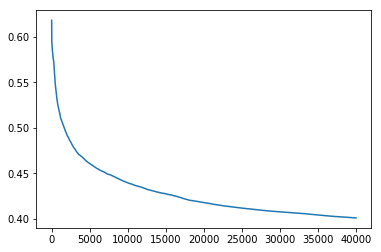

In [23]:
import time
startTime = time.time()
nnet = nn.NeuralNetwork(784, [100, 50, 2, 50, 100],784)
nnet.train(Xtrain, Xtrain, nIterations=40000, verbose=True)
print('Training took', (time.time() - startTime)/60, 'minutes.')
plt.plot(nnet.getErrorTrace())

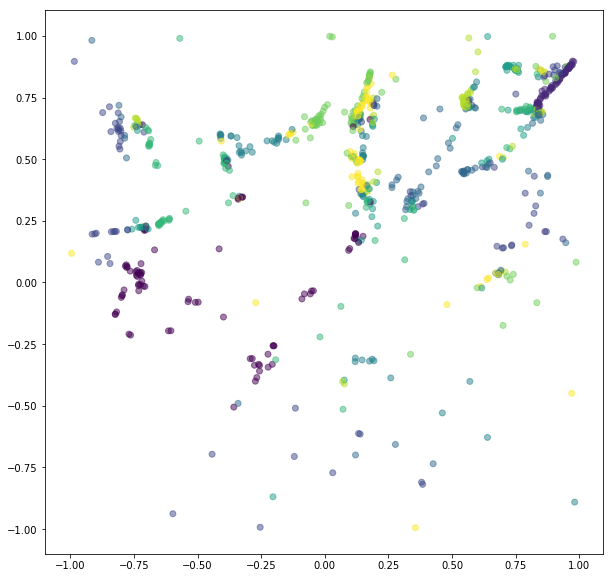

In [24]:
Y,allOutputs = nnet.use(Xtrain, allOutputs=True)
bottleNeck = allOutputs[2]
plt.figure(figsize=(10,10))
plt.scatter(bottleNeck[:,0], bottleNeck[:, 1], c=Ttrain.flat, alpha=0.5);

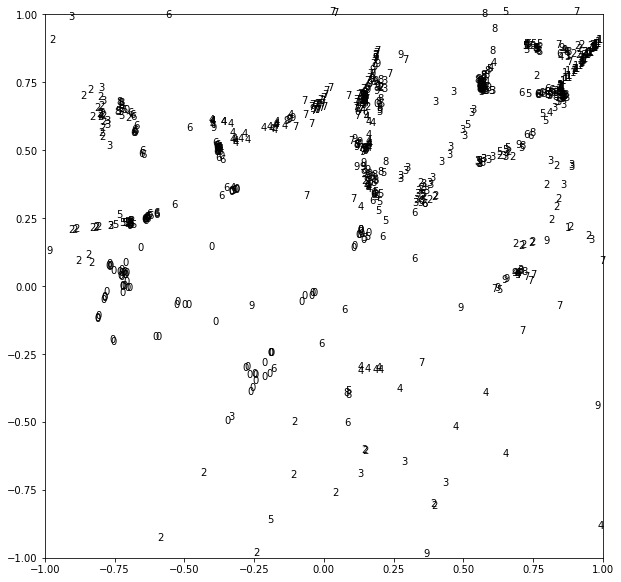

In [25]:
plt.figure(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)
for i, txt in enumerate(Ttrain.flat):
    plt.annotate(txt, (bottleNeck[i, 0], bottleNeck[i, 1]))

In [ ]:
plt.annotate?

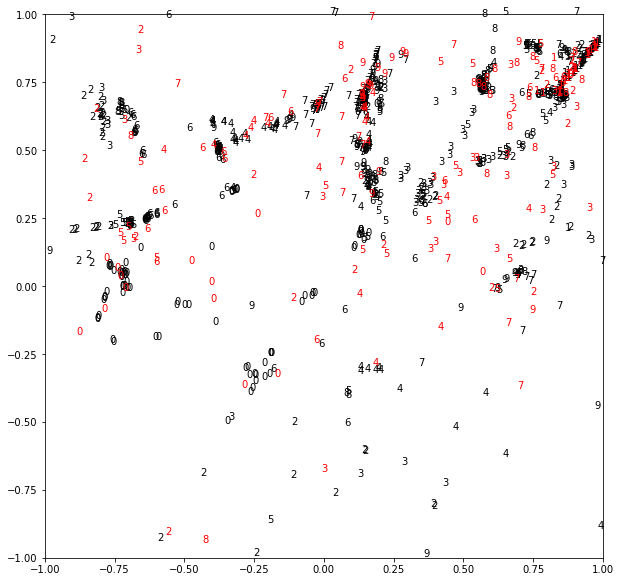

In [26]:
plt.figure(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)
for i, txt in enumerate(Ttrain.flat):
    plt.annotate(txt, (bottleNeck[i, 0], bottleNeck[i, 1]))
    
_,allOutputsTest = nnet.use(Xtest,allOutputs=True)
bottleTest = allOutputsTest[2]
for i, txt in enumerate(Ttest.flat):
    plt.annotate(txt, bottleTest[i,:], color='r');